In [40]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [29]:
torch.manual_seed(1)

In [3]:
model = nn.Linear(in_features=2, out_features=1)

In [4]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.3643, -0.3121]], requires_grad=True),
 Parameter containing:
 tensor([-0.1371], requires_grad=True)]

In [5]:
model.state_dict()

OrderedDict([('weight', tensor([[ 0.3643, -0.3121]])),
             ('bias', tensor([-0.1371]))])

In [6]:
x = torch.tensor([1.0, 3.0])
yhat = model(x)
yhat

tensor([-0.7090], grad_fn=<AddBackward0>)

In [8]:
x = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
yhat = model(x)
yhat

tensor([[-0.0848],
        [-0.3969],
        [-0.7090]], grad_fn=<AddmmBackward>)

In [33]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [35]:
model = linear_regression(input_size=2, output_size=1)
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.3286,  0.6938]])),
             ('linear.bias', tensor([-0.2992]))])

In [13]:
yhat = model(x)
yhat

tensor([[ 0.0903],
        [-0.5754],
        [-1.2411]], grad_fn=<AddmmBackward>)

In [30]:
from torch.utils.data import Dataset, DataLoader

In [31]:
class Data2D(Dataset):
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:,0] = torch.arange(-1, 1, 0.1)
        self.x[:,1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0], 1))
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [32]:
dataset = Data2D()

In [37]:
criterion = nn.MSELoss()

In [38]:
trainloader = DataLoader(dataset=dataset, batch_size=2)

In [25]:
model = linear_regression(input_size=2, output_size=1)

In [36]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [41]:
LOSS = []

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    plt.plot(LOSS)
    plt.show()

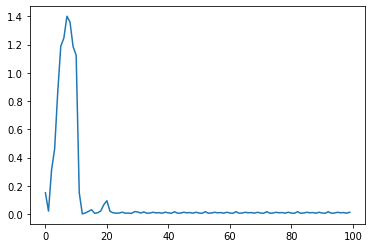

In [42]:
train_model(10)

In [43]:
### multiple linear regression prediction ####

In [45]:
import torch
import torch.nn as nn

torch.manual_seed(1)

In [46]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [48]:
model=linear_regression(1,10)
model(torch.tensor([1.0]))

tensor([-0.0930,  0.3446,  0.4924, -1.3425, -1.2713, -0.4345,  1.4742,  0.3770,
        -0.5496,  0.1552], grad_fn=<AddBackward0>)

In [50]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.3724],
                      [-0.6040],
                      [-0.1676],
                      [-0.4313],
                      [-0.3204],
                      [ 0.0479],
                      [ 0.5961],
                      [ 0.5435],
                      [-0.9776],
                      [ 0.6199]])),
             ('linear.bias',
              tensor([ 0.2794,  0.9486,  0.6601, -0.9111, -0.9508, -0.4823,  0.8781, -0.1666,
                       0.4280, -0.4647]))])

In [52]:
x=torch.tensor([[1.0]])
yhat = model(x)
yhat

tensor([[-0.0930,  0.3446,  0.4924, -1.3425, -1.2713, -0.4345,  1.4742,  0.3770,
         -0.5496,  0.1552]], grad_fn=<AddmmBackward>)

In [54]:
X=torch.tensor([[1.0],[1.0],[3.0]])
Yhat = model(X)
Yhat

tensor([[-0.0930,  0.3446,  0.4924, -1.3425, -1.2713, -0.4345,  1.4742,  0.3770,
         -0.5496,  0.1552],
        [-0.0930,  0.3446,  0.4924, -1.3425, -1.2713, -0.4345,  1.4742,  0.3770,
         -0.5496,  0.1552],
        [-0.8379, -0.8633,  0.1572, -2.2052, -1.9122, -0.3387,  2.6665,  1.4640,
         -2.5047,  1.3951]], grad_fn=<AddmmBackward>)